In [1]:
#importing required packages

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist
%matplotlib inline

In [6]:
#reading the Kaggle's toy dataset
customers= pd.read_csv("Downloads/toy_dataset.csv")

In [7]:
customers.head(5)

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [16]:
#taking only 15000 rows and only Age and income columns for now

df = customers.iloc[:35000, 3:5].values
print(df)

[[4.1000e+01 4.0367e+04]
 [5.4000e+01 4.5084e+04]
 [4.2000e+01 5.2483e+04]
 ...
 [3.0000e+01 8.9261e+04]
 [3.2000e+01 8.7940e+04]
 [4.3000e+01 8.8967e+04]]


Text(0, 0.5, 'income')

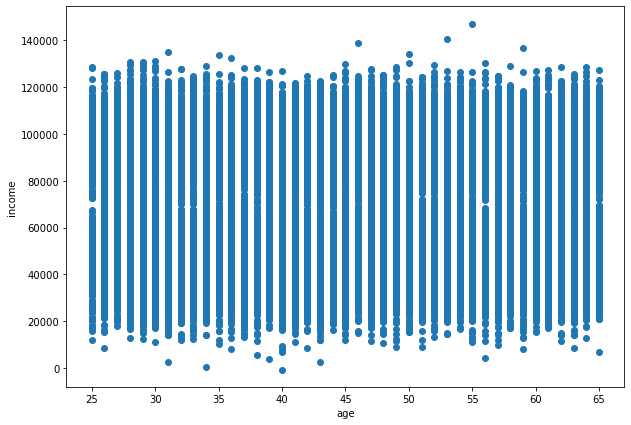

In [15]:
fig= plt.figure(figsize=(10,7))
plt.scatter(df[:,0], df[:,1])
plt.xlabel('age')
plt.ylabel('income')

In [18]:
#Scaling the data
scaler = MinMaxScaler()
df= scaler.fit_transform(df)
print(df)

[[0.4        0.27749892]
 [0.725      0.30940849]
 [0.425      0.35946125]
 ...
 [0.125      0.60825712]
 [0.175      0.59932081]
 [0.45       0.60626826]]


Text(0, 0.5, 'income')

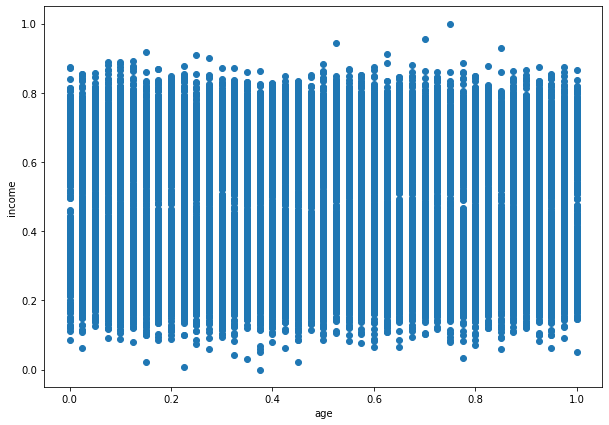

In [19]:
#plotting df again
fig= plt.figure(figsize=(10,7))
plt.scatter(df[:,0], df[:,1])
plt.xlabel('age')
plt.ylabel('income')

In [21]:
#giving number of clusters as input
kmeans = KMeans(n_clusters=7).fit(df)

#Coordinates of cluster centers
centroids = kmeans.cluster_centers_
print(centroids)

[[0.83300531 0.65981476]
 [0.12958975 0.30851995]
 [0.16871354 0.65938802]
 [0.63828351 0.31132814]
 [0.88242704 0.31164142]
 [0.4997767  0.66013333]
 [0.38831331 0.31040446]]


In [22]:
#each data point is assigned a specific label according to cluster
kmeans.labels_

array([6, 3, 6, ..., 2, 2, 5], dtype=int32)

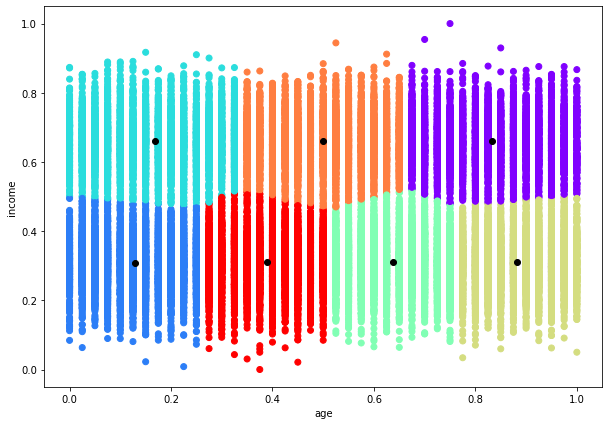

In [23]:
#results of clustering as a 3D scatter plot

fig = plt.figure(figsize=(10,7))
plt.scatter(df[:,0], df[:,1], c= kmeans.labels_, cmap= 'rainbow')
plt.scatter(centroids[:,0], centroids[:,1], c='black')
plt.xlabel('age')
plt.ylabel('income')

plt.show()

Determining optimal number of clusters using elbow curve method

In [25]:
distance=[]
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    kmeans.fit(df)
    
    #for each iteration, we are appending average distance of a datapoint from centroids to the distance list
    distance.append(sum(np.min(cdist(df, kmeans.cluster_centers_, 'euclidean'), axis=1))/df.shape[0])

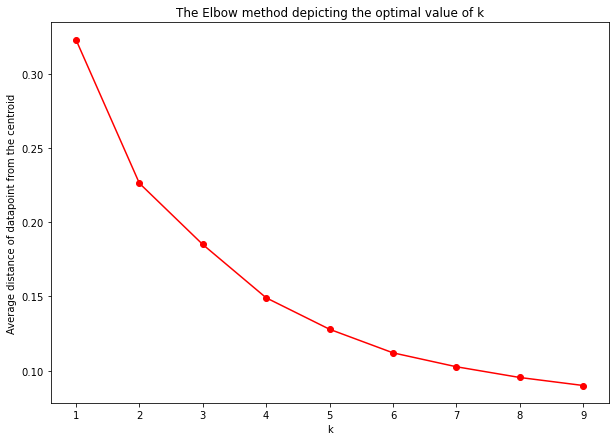

In [26]:
#plotting the elbow curve

fig = plt.figure(figsize=(10,7))
plt.plot(K, distance, 'ro-')
plt.xlabel('k')
plt.ylabel('Average distance of datapoint from the centroid')
plt.title('The Elbow method depicting the optimal value of k')

plt.show()

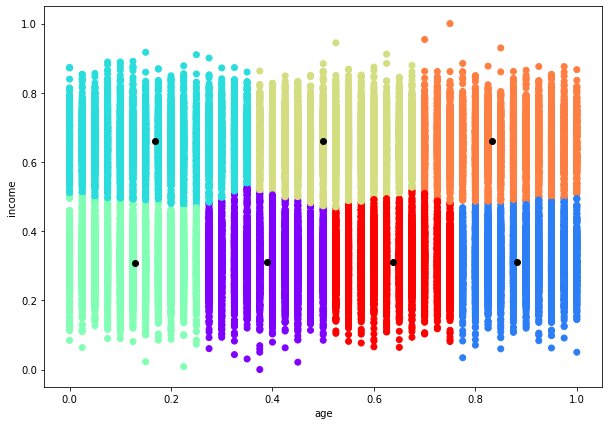

In [27]:
#going ahead with k=6
kmeans = KMeans(n_clusters=7).fit(df)


fig = plt.figure(figsize=(10,7))
plt.scatter(df[:,0], df[:,1], c= kmeans.labels_, cmap= 'rainbow')
plt.scatter(centroids[:,0], centroids[:,1], c='black')
plt.xlabel('age')
plt.ylabel('income')

plt.show()